In [1]:
import numpy as np
import random as random
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time
import pandas as pd
import multiprocessing
import itertools
from scipy.spatial import distance
import networkx as nx
import time
from tqdm import tqdm
np.set_printoptions(threshold=np.nan)

Path = ''

In [2]:
IP_farms = pd.read_csv(Path + "IPFarms2001", delim_whitespace=True, names = ['Farm Number', 'Date Infected'])
Data_farms =pd.read_csv(Path + "FarmData2001", delim_whitespace=True, names = ['County Number', 'Parish Number', 'Holding Number'
,'X coordinate','Y coordinate','Farm Area','Number of cattle','Number of pigs','Number of sheep','Number of goats','Number of other animals'])
Cull_farms = pd.read_csv(Path + "CullFarms2001", delim_whitespace=True, names = ['Farm Number', 'Date Culled'])
kernel = pd.read_csv(Path + "Kernel", delim_whitespace=True, names = ['Distance', 'Risk of infection'])
cattleFrame = Data_farms['Number of cattle']
sheepFrame = Data_farms['Number of sheep']
cattle = abs(cattleFrame.values)
sheep = abs(sheepFrame.values)

ipfarms=IP_farms.values
cullfarms=Cull_farms.values
datafarms = Data_farms.values

In [3]:
Data_farms['X coordinate'];

In [4]:
print(len(ipfarms), len(datafarms), len(cullfarms))

2026 188496 8216


In [5]:
maxt1 = np.max(ipfarms[:,1])
maxt2 = np.max(ipfarms[:,1])
print(np.max(ipfarms[:,0]))
print(np.max(cullfarms[:,0]))
maxTime = max(maxt1, maxt2)
print(maxTime)

187149
188496
224


In [6]:
culledCattle = [] #To store cumulative number of cattle culled
culledSheep = [] #To store cumulative number of sheep culled

Text(0.5,1,'Number of Farms Infected throughout the 2001 FMD Outbreak')

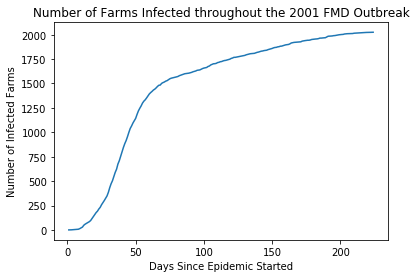

In [7]:

infect = []
culledCattle = [] #To store cumulative number of cattle culled
culledSheep = [] #To store cumulative number of sheep culled
for t in range(maxTime):
    infectInd = [ipfarms[i,0] for i in range(len(ipfarms)) if ipfarms[i,1] <= t]
    culledInd = [cullfarms[i, 0] for i in range(len(cullfarms)) if cullfarms[i,1] <= t]
    totalCulledInd = np.union1d(infectInd, culledInd)
    infect.append(len(infectInd))
    culledCattle.append(sum(cattle[totalCulledInd.astype(int)-1]))
    culledSheep.append(sum(sheep[totalCulledInd.astype(int)-1]))
    
xrange = np.linspace(1, maxTime, maxTime)
yrange = infect
yrange2 = culledCattle
yrange3 = culledSheep
#plt.plot(xrange, yrange2, label='cattle')
plt.plot(xrange, yrange)
plt.xlabel("Days Since Epidemic Started")
plt.ylabel("Number of Infected Farms")
plt.title("Number of Farms Infected throughout the 2001 FMD Outbreak")
#plt.legend()

Text(0.5,1,'Distance Kernel')

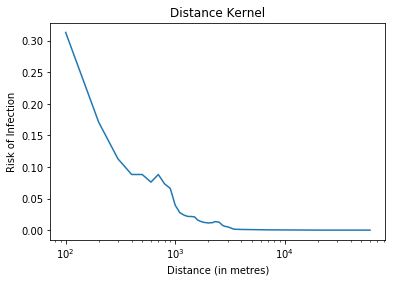

In [8]:
plt.semilogx(kernel.values[:,0], kernel.values[:,1])
plt.xlabel('Distance (in metres)')
plt.ylabel('Risk of Infection')
plt.title('Distance Kernel')

Text(13,0.73,'Reported')

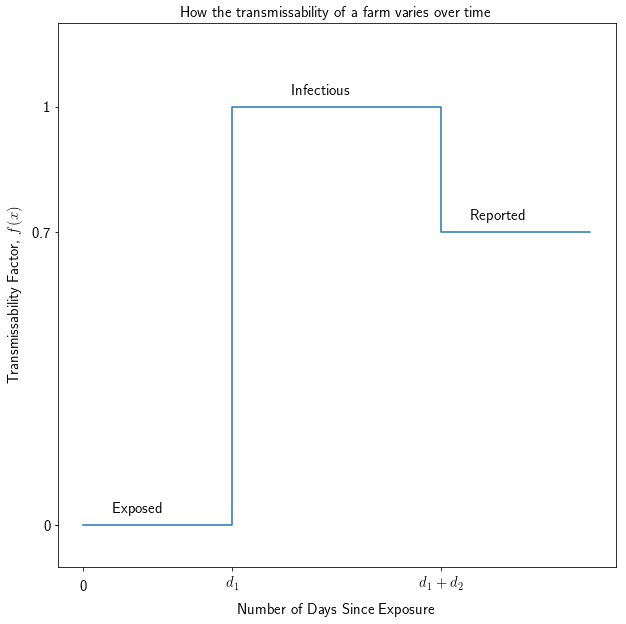

In [22]:
d1 = 5
d2 = 7
x = [0, d1, d1+d2, d1+d2+5]
y = [0, 0, 1, 0.7]

fig = plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
plt.rc('text', usetex=True)
labelsx = ['0', r"$d_1$", r"$d_1+d_2$", ""]
labelsy = ['0', '', '1', '0.7']
plt.step(x,y)
plt.xlabel('Number of Days Since Exposure', fontsize=15, labelpad=10)
plt.xticks(x, labelsx, fontsize=15)
plt.yticks(y, labelsy, fontsize=15)
xticks = ax.xaxis.get_major_ticks()
xticks[-1].set_visible(False)

plt.ylabel('Transmissability Factor, $f(x)$', fontsize=15, labelpad=10)
plt.title('How the transmissability of a farm varies over time', fontsize=15)
plt.ylim([-0.1, 1.2])

ax.tick_params(axis='x', pad=10)

ax.text(1, 0.03, r'Exposed', fontsize=15)
ax.text(7, 1.03, r'Infectious', fontsize=15)
ax.text(13, 0.73, r'Reported', fontsize=15)